In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread(r"C:\Users\671473\Downloads\map.png",0)
# img = cv2.cvtColor(cv2.COLOR_BGR2GRAY)
mblur=cv2.medianBlur(img,5)

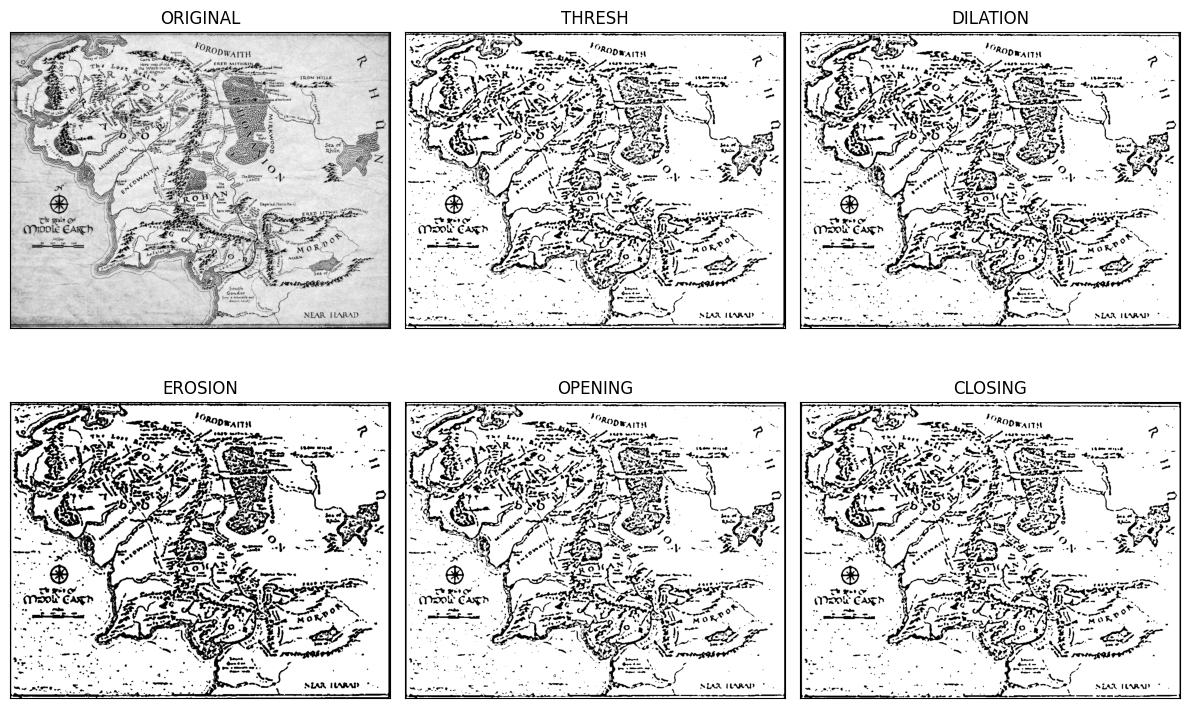

In [10]:

gblur = cv2.GaussianBlur(mblur, (5, 5), 2)  # Apply Gaussian blur before thresholding
result = cv2.adaptiveThreshold(mblur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 25, 10)  

 
kernel = np.ones((2,2), dtype=np.uint8)                 # kernel = 2x2 [[1,1], [1,1]]


erosion = cv2.erode(result, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations=1)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

# Optional: Apply median filtering for better noise removal
# closing = cv2.medianBlur(closing, 3)  # Apply median filter for noise reduction


# Titles and images for display
titles = ["ORIGINAL", "THRESH", "DILATION", "EROSION", "OPENING", "CLOSING"]
images = [img, result, dilation, erosion, opening, closing]

# Plot the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display image in grayscale
    ax.set_title(titles[i])
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks

plt.tight_layout()  # Ensure the layout doesn't overlap
plt.show()

In [4]:

# Define a function to update the image based on trackbar settings
def update(val):
    # Get the current values from the trackbars
    blockSize = cv2.getTrackbarPos('Block Size', 'Result')
    C = cv2.getTrackbarPos('C', 'Result')
    kernel_size = cv2.getTrackbarPos('Kernel Size', 'Result')
    iterations = cv2.getTrackbarPos('Iterations', 'Result')

    if blockSize % 2 == 0:  # blockSize must be odd
        blockSize += 1

    # Apply Gaussian Blur
    gblur = cv2.GaussianBlur(mblur, (5, 5), 2)

    # Adaptive Thresholding
    result = cv2.adaptiveThreshold(gblur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, blockSize, C)

    # Morphological Operations (Erosion, Dilation, Opening, Closing)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    erosion = cv2.erode(result, kernel, iterations=iterations)
    dilation = cv2.dilate(erosion, kernel, iterations=iterations)
    opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations=iterations)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # Show the result
    cv2.imshow('Result', closing)

# Load your image

img = cv2.imread(r"C:\Users\671473\Downloads\map.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image path
mblur=cv2.medianBlur(img,5)

# Create a window for the result
cv2.namedWindow('Result')

# Create trackbars to control parameters
cv2.createTrackbar('Block Size', 'Result', 15, 35, update)  # Block size (15-35)
cv2.createTrackbar('C', 'Result', 10, 20, update)           # Constant C (5-20)
cv2.createTrackbar('Kernel Size', 'Result', 3, 7, update)   # Kernel size (3-7)
cv2.createTrackbar('Iterations', 'Result', 2, 5, update)    # Iterations (2-5)

# Initialize the display
update(0)  # Call the update function once to display the initial image

# Wait until the user presses a key
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
